# Pokemon GAN Training Notebook

**Import libraries**

In [6]:
import pandas as pd
from torch.utils.data import DataLoader
from dataset import PokemonDataset
from GAN import WGAN
from utils import show_tensor_images
import os

**Load labels**

In [20]:
resume_training = True
train_number = 17
gan_id = f"pokemon_train_{train_number}"

In [21]:
to_load_id = "pokemon_train_10"

In [22]:
greyscale = False
image_dim = 64

In [23]:
dset = PokemonDataset(greyscale, resize=[image_dim, image_dim], shiny=True, frame2=True)
dloader = DataLoader(dset, batch_size=32, shuffle=True, num_workers=0)

In [24]:
len(dset)

1220

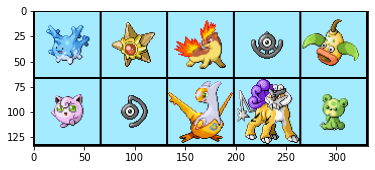

In [25]:
show_tensor_images(next(iter(dloader))[0])

**GAN Component**

In [26]:
betas = (.9, .999)
n_channel = 1 if greyscale else 3
n_feature = 64
z_dim = 50
    
params = {'gen': {'n_feature': n_feature,
                  'n_channel': n_channel,
                  'lr': 5e-5,
                  'betas': betas},
          'critic': {'n_channel': n_channel,
                     'n_feature': n_feature,
                     'lr': 5e-5,
                     'betas': betas},
          'z_dim': z_dim,
          'gradient_penalty_factor': 3,
          'stability_noise_std': 5e-2,
          'n_conv_block': 3
         }

In [27]:
n_channel

3

**Load pre trained GAN**

In [28]:
gan = WGAN(params)
if os.path.exists(f'data/models/{to_load_id}.pth'):
    print('RESUMING TRAINING...')
    gan.load_model(f'data/models/{to_load_id}.pth')
else:
    print('NEW TRAINING...')

RESUMING TRAINING...


In [29]:
gan.init_tensorboard(main_dir='runs', subdir=gan_id, port=8008)

In [82]:
gan.train(n_epoch=100, dataloader=dloader, n_critic_update=1, n_generator_update=1, gan_id=gan_id)

100%|██████████| 100/100 [04:23<00:00,  2.64s/it]


**RESULT**

In [31]:
import torch

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


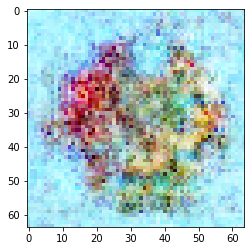

In [142]:
noise = gan.get_random_noise(1)

show_tensor_images(gan.generator(noise))

In [55]:


r = list(range(10, 30, 1)) + list(range(30, 40, 10))
v = 1 # 99999999999

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


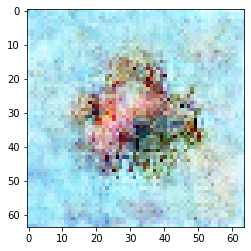

In [14]:
noise = gan.get_random_noise(1)
noise = torch.ones_like(noise)

noise[:, r] = v
show_tensor_images(gan.generator(noise))